In [ ]:
%%html
<!--Script block to left align Markdown Tables-->
<style>
  table {margin-left: 0 !important;}
</style>

**Download** (right-click, save target as ...) this page as a jupyterlab notebook from: [Lab24](http://54.243.252.9/engr-1330-webroot/8-Labs/Lab24/Lab24.ipynb)

___

# <font color=green>Laboratory 24: "Predictor-Response Data Models"</font>

LAST NAME, FIRST NAME

R00000000

ENGR 1330 Laboratory 24 

## Exercise: Watershed Response Metrics 

### Background 
Rainfall-Runoff response prediction is a vital step in engineering design for mitigating flood-induced infrastructure failure.   One easy to measure characteristic of a watershed is its drainage area.  Harder to quantify are its characteristic response time, and its conversion (of precipitation into runoff) factor.

### Study Database

The [watersheds.csv](http://54.243.252.9/engr-1330-webroot/4-Databases/watersheds.csv) dataset contains (measured) drainage area for 92 study watersheds in Texas from [Cleveland, et. al., 2006](https://192.168.1.75/documents/about-me/MyWebPapers/journal_papers/ASCE_Irrigation_Drainage_IR-022737/2006_0602_IUHEvalTexas.pdf), and the associated data:

|Columns|Info.|
|:---|:---|
|STATION_ID |USGS HUC-8 Station ID code|
|TDA |Total drainage area (sq. miles) |
|RCOEF|Runoff Ratio (Runoff Depth/Precipitation Depth)|
|TPEAK|Characteristic Time (minutes)|
|FPEAK|Peaking factor (same as NRCS factor)|
|QP_OBS|Observed peak discharge (measured)|
|QP_MOD|Modeled peak discharge (modeled)| 

### :

Using the following steps, build a predictor-response type data model. 


<hr/><hr/> 

**Step 1:** 

<hr/>

Read the "watersheds.csv" file as a dataframe. Explore the dataframe and in a markdown cell briefly describe the summarize the dataframe. <br>

In [5]:
# import packages
import pandas, numpy
# read data file
mydata = pandas.read_csv("watersheds.csv")
# summarize contents + markdown cell as needed
mydata.head()

,STATION_ID,TDA,RCOEF,TPEAK,FPEAK,QP_OBS,QP_MOD
0,08158920,6.3,0.3083,127.43,1.61,0.00932,0.005150
1,08158930,19.0,0.2108,190.44,3.69,0.00521,0.002680
2,08158970,27.6,0.1838,339.06,5.59,0.00454,0.001910
3,08154700,22.3,0.1803,266.64,2.86,0.00498,0.003080
4,08155200,89.7,0.1876,722.50,2.25,0.00184,0.000745


<hr/><hr/> 

**Step 2:** <hr/>

Make a data model using **TDA** as a predictor of **TPEAK** ($T_{peak} = \beta_{0}+\beta_{1}*TDA$) <br> Plot your model and the data on the same plot. Report your values of the parameters.

In [116]:
predictor = mydata['TDA'].tolist()
response = mydata['TPEAK'].tolist()

In [117]:
# Our data model
def poly1(b0,b1,x):
    # return y = b0 + b1*x
    poly1=b0+b1*x
    return(poly1)

In [118]:
intercept = 200
slope = 6.0
sortedpred = sorted(predictor)
modelresponse = [] # empty list
for i in range(len(sortedpred)):
    modelresponse.append(poly1(intercept,slope,sortedpred[i]))

In [119]:
# Our plotting function
import matplotlib.pyplot as plt
def make2plot(listx1,listy1,listx2,listy2,strlablx,strlably,strtitle):
    mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
    plt.plot(listx1,listy1, c='red', marker='p',linewidth=0) # basic data plot
    plt.plot(listx2,listy2, c='blue',linewidth=1) # basic model plot
    plt.xlabel(strlablx)
    plt.ylabel(strlably)
    plt.legend(['Data','Model'])# modify for argument insertion
    plt.title(strtitle)
    plt.show()

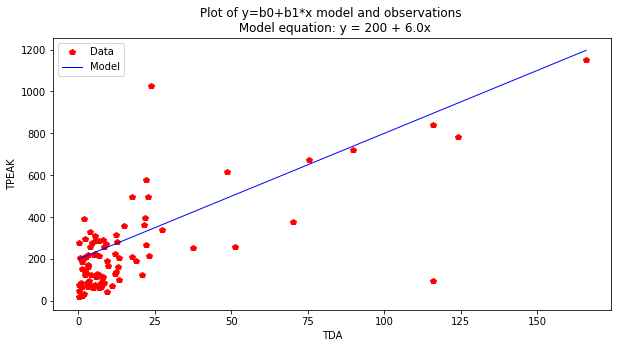

In [120]:
# Plotting results
charttitle="Plot of y=b0+b1*x model and observations \n" + " Model equation: y = " + str(intercept) + " + " + str(slope) + "x"
make2plot(predictor,response,sortedpred,modelresponse,'TDA','TPEAK',charttitle)

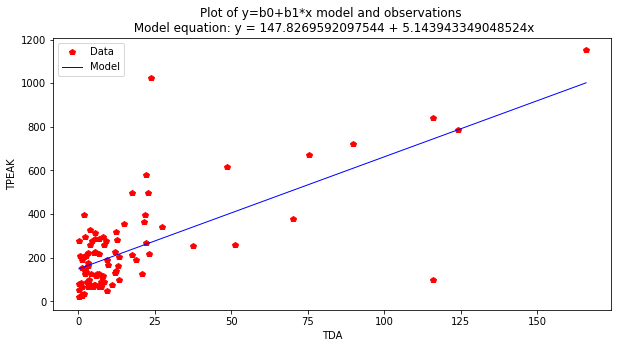

In [121]:
# solving the linear system to make a model
##############################
import numpy
X = [numpy.ones(len(predictor)),numpy.array(predictor)] # build the design X matrix #
X = numpy.transpose(X) # get into correct shape for linear solver
Y = numpy.array(response) # build the response Y vector
A = numpy.transpose(X)@X # build the XtX matrix
b = numpy.transpose(X)@Y # build the XtY vector
x = numpy.linalg.solve(A,b) # avoid inversion and just solve the linear system 
sortedpred = sorted(predictor)
modelresponse = [] # empty list
for i in range(len(sortedpred)):
    modelresponse.append(poly1(x[0],x[1],sortedpred[i]))
# Plotting results
charttitle="Plot of y=b0+b1*x model and observations \n" + " Model equation: y = " + str(x[0]) + " + " + str(x[1]) + "x"
make2plot(predictor,response,sortedpred,modelresponse,'TDA','TPEAK',charttitle)

<hr/><hr/> 

**Step 3:**

<hr/>

Make a data model using **log(TDA)** as a predictor of **TPEAK** ($T_{peak} = \beta_{0}+\beta_{1}*log(TDA)$)

In your opinion which mapping of **TDA**  (arithmetic or logarithmic) produces a more useful graph? 

In [3]:
#

In [122]:
import math
predictor = mydata['TDA'].apply(math.log).tolist()
response = mydata['TPEAK'].tolist()

In [123]:
# Our data model
def poly1(b0,b1,x):
    # return y = b0 + b1*x
    poly1=b0+b1*x
    return(poly1)

In [127]:
intercept = 1
slope = 120.0
sortedpred = sorted(predictor)
modelresponse = [] # empty list
for i in range(len(sortedpred)):
    modelresponse.append(poly1(intercept,slope,sortedpred[i]))

In [128]:
# Our plotting function
import matplotlib.pyplot as plt
def make2plot(listx1,listy1,listx2,listy2,strlablx,strlably,strtitle):
    mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
    plt.plot(listx1,listy1, c='red', marker='p',linewidth=0) # basic data plot
    plt.plot(listx2,listy2, c='blue',linewidth=1) # basic model plot
    plt.xlabel(strlablx)
    plt.ylabel(strlably)
    plt.legend(['Data','Model'])# modify for argument insertion
    plt.title(strtitle)
    plt.show()

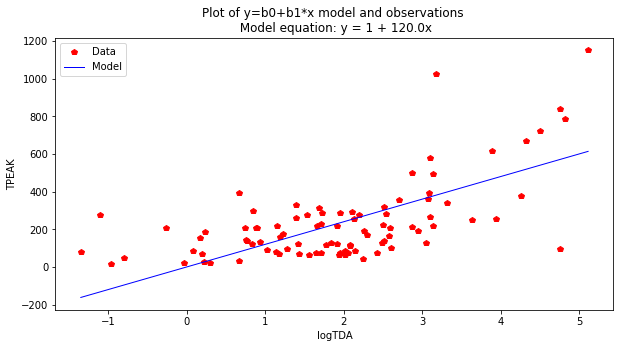

In [129]:
# Plotting results
charttitle="Plot of y=b0+b1*x model and observations \n" + " Model equation: y = " + str(intercept) + " + " + str(slope) + "x"
make2plot(predictor,response,sortedpred,modelresponse,'logTDA','TPEAK',charttitle)

In [130]:
# lets try a quadratic
def poly2(b0,b1,b2,x):
    # return y = b0 + b1*x
    poly2=b0+b1*x+b2*x**2
    return(poly2)
# solving the linear system to make a model
##############################
import numpy
X = [numpy.ones(len(predictor)),numpy.array(predictor),numpy.array(predictor)**2] # build the design X matrix #
X = numpy.transpose(X) # get into correct shape for linear solver
Y = numpy.array(response) # build the response Y vector
A = numpy.transpose(X)@X # build the XtX matrix
b = numpy.transpose(X)@Y # build the XtY vector
x = numpy.linalg.solve(A,b) # avoid inversion and just solve the linear system 
predictor.sort()

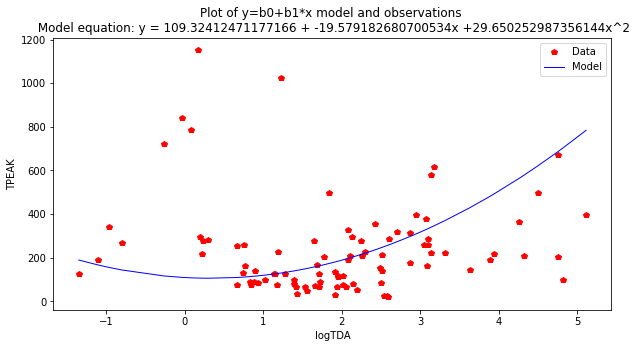

In [131]:
sortedpred = sorted(predictor)
modelresponse = [] # empty list
for i in range(len(sortedpred)):
    modelresponse.append(poly2(x[0],x[1],x[2],sortedpred[i]))
# Plotting results
charttitle="Plot of y=b0+b1*x model and observations \n" + " Model equation: y = " + str(x[0]) + " + " + str(x[1]) + "x +" + str(x[2]) + "x^2"
make2plot(predictor,response,sortedpred,modelresponse,'logTDA','TPEAK',charttitle)